#### Importing relevant packages

In [12]:
import os
import mailbox
import pandas as pd
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt

#### Parsing the TREC corpus dataset
We'll be using pySpark to speed up the process.


In [13]:
# We'll be using this function to parse an email 
# into a dict (mail header fields + mail body).
def parse_mbox_email(email):
    email_dict = {}
    email_dict['body'] = email.get_payload()
    for field in email.keys():
        value = email.get(field)
        email_dict[field] = value
    return email_dict

In [14]:
directory_path = 'datasets/trec07p/data/'
mbox_files = [directory_path + f for f in  os.listdir(directory_path) if not f.startswith('.')]

spark = SparkSession.builder.appName("MboxParser").getOrCreate()
rdd = spark.sparkContext.parallelize(mbox_files).flatMap(lambda file: mailbox.mbox(file))
emails = rdd.map(parse_mbox_email).collect()
df = pd.DataFrame(emails)

23/03/13 03:32:46 ERROR Executor: Exception in task 2.0 in stage 1.0 (TID 14)
java.lang.OutOfMemoryError: Java heap space
	at java.base/java.util.Arrays.copyOf(Arrays.java:3745)
	at java.base/java.io.ByteArrayOutputStream.grow(ByteArrayOutputStream.java:120)
	at java.base/java.io.ByteArrayOutputStream.ensureCapacity(ByteArrayOutputStream.java:95)
	at java.base/java.io.ByteArrayOutputStream.write(ByteArrayOutputStream.java:156)
	at org.apache.spark.util.ByteBufferOutputStream.write(ByteBufferOutputStream.scala:41)
	at java.base/java.io.ObjectOutputStream$BlockDataOutputStream.write(ObjectOutputStream.java:1849)
	at java.base/java.io.ObjectOutputStream.write(ObjectOutputStream.java:708)
	at org.apache.spark.util.Utils$.writeByteBuffer(Utils.scala:244)
	at org.apache.spark.scheduler.DirectTaskResult.$anonfun$writeExternal$1(TaskResult.scala:53)
	at org.apache.spark.scheduler.DirectTaskResult$$Lambda$1938/0x0000000840bd3040.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mc

Exception in thread "task-result-getter-3" Exception in thread "task-result-getter-1" Exception in thread "task-result-getter-2" Exception in thread "task-result-getter-0" java.lang.InterruptedException
	at java.base/java.util.concurrent.locks.AbstractQueuedSynchronizer.doAcquireSharedInterruptibly(AbstractQueuedSynchronizer.java:1040)
	at java.base/java.util.concurrent.locks.AbstractQueuedSynchronizer.acquireSharedInterruptibly(AbstractQueuedSynchronizer.java:1345)
	at scala.concurrent.impl.Promise$DefaultPromise.tryAwait(Promise.scala:242)
	at scala.concurrent.impl.Promise$DefaultPromise.ready(Promise.scala:258)
	at scala.concurrent.impl.Promise$DefaultPromise.result(Promise.scala:263)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:293)
	at org.apache.spark.network.BlockTransferService.fetchBlockSync(BlockTransferService.scala:103)
	at org.apache.spark.storage.BlockManager.fetchRemoteManagedBuffer(BlockManager.scala:1159)
	at org.apache.spark.storage.BlockManage

23/03/13 03:32:49 ERROR TransportClient: Failed to send RPC StreamChunkId[streamId=1538770045014,chunkIndex=0] to /172.29.78.216:33373: java.io.IOException: Broken pipe
java.io.IOException: Broken pipe
	at java.base/sun.nio.ch.FileDispatcherImpl.write0(Native Method)
	at java.base/sun.nio.ch.SocketDispatcher.write(SocketDispatcher.java:47)
	at java.base/sun.nio.ch.IOUtil.writeFromNativeBuffer(IOUtil.java:113)
	at java.base/sun.nio.ch.IOUtil.write(IOUtil.java:58)
	at java.base/sun.nio.ch.IOUtil.write(IOUtil.java:50)
	at java.base/sun.nio.ch.SocketChannelImpl.write(SocketChannelImpl.java:462)
	at io.netty.channel.socket.nio.NioSocketChannel.doWrite(NioSocketChannel.java:408)
	at io.netty.channel.AbstractChannel$AbstractUnsafe.flush0(AbstractChannel.java:931)
	at io.netty.channel.nio.AbstractNioChannel$AbstractNioUnsafe.flush0(AbstractNioChannel.java:354)
	at io.netty.channel.AbstractChannel$AbstractUnsafe.flush(AbstractChannel.java:895)
	at io.netty.channel.DefaultChannelPipeline$HeadCon

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 33084)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/home/user01/miniconda3/lib/python3.10/site-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/user01/miniconda3/lib/python3.10/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/user01/miniconda3/lib/python3.10/site-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving
Traceback (most recent call last):
  File "/home/user01/miniconda3/lib/python3.10/socketserver.py", line 

ConnectionRefusedError: [Errno 111] Connection refused

In [8]:
df

Return-Path  \
0      <beginners-return-92766-ktwarwic=speedy.uwater...   
1                                       <dwehbm@ehb.com>   
2                      <obstructioncontiguous@tre-x.org>   
3                     <r-help-bounces@stat.math.ethz.ch>   
4                         <kdlfeipybksv@brainerdoil.com>   
...                                                  ...   
75414                             <richard@guitarra.biz>   
75415                            <othjqebmxf@uol.com.br>   
75416                          <cslaughter@specinst.com>   
75417  <samba-technical-bounces+ktwarwic=speedy.uwate...   
75418  <b.Devine.12-92f99b8-88.speedy.uwaterloo.ca.-p...   

                                                Received  \
0      from lists.develooper.com (x6.develooper.com [...   
1      from ABTS-NCR-Dynamic-186.145.162.122.airtelbr...   
2      from 85-211-116-16.dyn.gotadsl.co.uk (85-211-1...   
3      from hypatia.math.ethz.ch (hypatia.math.ethz.c...   
4      from plg2.math.uwaterloo.ca (plg2.math.uwaterl...   
...                                                  ...   
75414  from friend ([88.103.111.208])\n\tby flax9.uwa...   
75415  from flax24.uwaterloo.ca (flax24.uwaterloo.ca ...   
75416  from 129.97.186.209 ([201.224.79.8])\n\tby fla...   
75417  from lists.samba.org (mail.samba.org [66.70.73...   
75418  from ratchet.bestmortgagemethod.net (ratchet.b...   

                                        Mailing-List Precedence  \
0      contact beginners-help@perl.org; run by ezmlm       bulk   
1                                                NaN        NaN   
2                                                NaN        NaN   
3                                                NaN       list   
4                                                NaN        NaN   
...                                              ...        ...   
75414                                            NaN        NaN   
75415                                            NaN        NaN   
75416                                            NaN        NaN   
75417                                            NaN       list   
75418                                            NaN        NaN   

                                      List-Post  \
0                   <mailto:beginners@perl.org>   
1                                           NaN   
2                                           NaN   
3             <mailto:r-help@stat.math.ethz.ch>   
4                                           NaN   
...                                         ...   
75414                                       NaN   
75415                                       NaN   
75416                                       NaN   
75417  <mailto:samba-technical@lists.samba.org>   
75418                                       NaN   

                                               List-Help  \
0                       <mailto:beginners-help@perl.org>   
1                                                    NaN   
2                                                    NaN   
3      <mailto:r-help-request@stat.math.ethz.ch?subje...   
4                                                    NaN   
...                                                  ...   
75414                                                NaN   
75415                                                NaN   
75416                                                NaN   
75417  <mailto:samba-technical-request@lists.samba.or...   
75418                                                NaN   

                                        List-Unsubscribe  \
0                <mailto:beginners-unsubscribe@perl.org>   
1                                                    NaN   
2                                                    NaN   
3      <https://stat.ethz.ch/mailman/listinfo/r-help>...   
4                                                    NaN   
...                                                  ...   
75414                                       

In [10]:
import Levenshtein # You'll need to install this package using pip or conda

# Define a list of words to cluster
words = df.columns

# Define a threshold edit distance for clustering
threshold = 2

# Create an empty dictionary to hold clusters
clusters = {}

# Iterate over each word in the list
for word in words:

    # Create an empty list to hold matching clusters
    matches = []

    # Iterate over each cluster in the dictionary
    for cluster in clusters:
        # Check if the word is within the threshold edit distance of any word in the cluster
        for member in clusters[cluster]:
            distance = Levenshtein.distance(word, member)
            if distance <= threshold:
                matches.append(cluster)
                break
            
    # If the word matches an existing cluster, add it to that cluster
    if len(matches) > 0:
        clusters[matches[0]].append(word)

    # If the word doesn't match any existing clusters, create a new cluster
    else:
        clusters[word] = [word]
        
clusters_list = []
# Print the resulting clusters
for cluster in clusters:
    if len(clusters[cluster]) > 1:
        print(cluster, clusters[cluster])
        clusters_list.append(clusters[cluster])


Return-Path ['Return-Path', 'X-Return-Path', '>Return-Path']
Received ['Received', 'X-Received', 'X-Receiver']
Mailing-List ['Mailing-List', 'X-Mailing-List']
List-Unsubscribe ['List-Unsubscribe', 'list-unsubscribe']
List-Id ['List-Id', 'List-ID']
X-Virus-Scanned ['X-Virus-Scanned', 'X-Virus-Scanner', 'X-Virii-Scanned']
X-Trace ['X-Trace', 'X-Face', 'X-Date', 'X-DDate', 'X-Cat', 'X-Mice', 'X-Note', 'Face']
Message-ID ['Message-ID', 'Message-Id', 'X-Message-Id', 'Message-id', 'XMessage-Id', 'X-Message-ID', 'XMessage-ID', 'message-id']
Reply-To ['Reply-To', 'Reply-to', 'Replyto', 'reply-to', 'X-Reply-To']
From ['From', 'from']
To ['To', 'Cc', 'CC', 'TO', 'X-To', 'X-IP', 'X-ID', 'X-PPS', 'Bcc', 'X-EMID', 'MTA', 'X-UID', 'cc', 'to', 'X-FID', 'X-FBK', 'X-{', 'X-a', 'X->', 'X-|', 'X-BPS1', 'X-AF-ID', 'X-AF-PWD', 'X-OS', 'X-Ids', 'X-PM', 'MUA', 'X-MID', 'X-Fun', 'X-UoM', 'X-M', 'X-GPG', 'X-TUID']
References ['References', 'references']
Subject ['Subject', 'subject']
Date ['Date', 'date', 'Pat

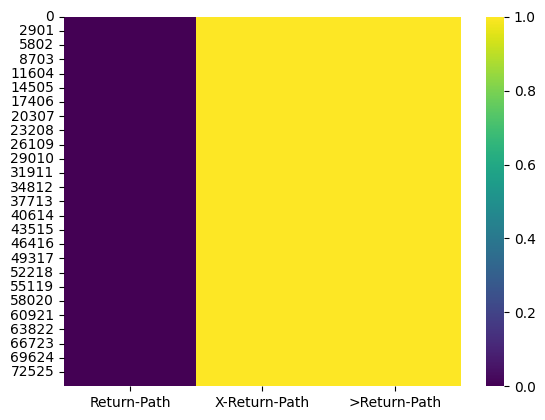

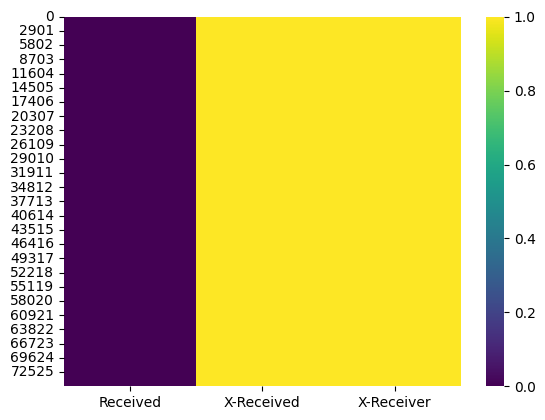

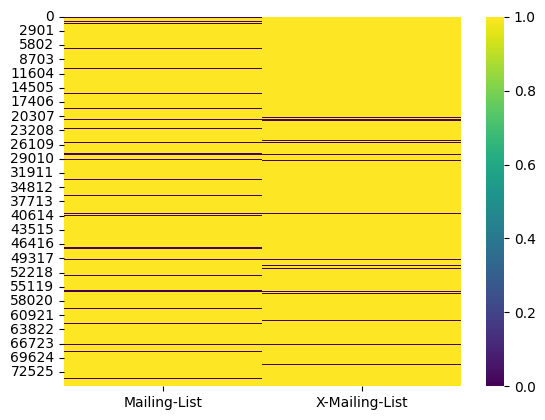

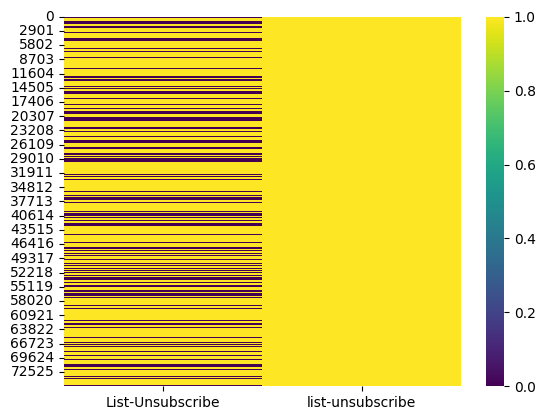

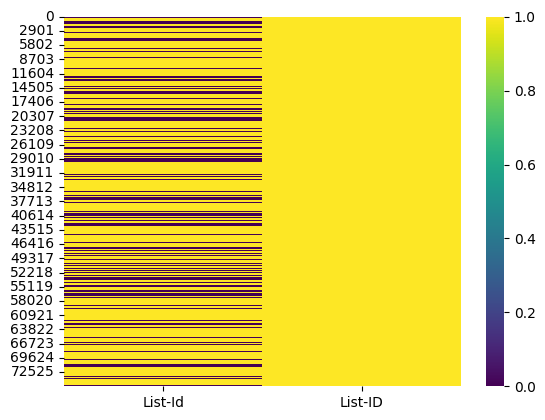

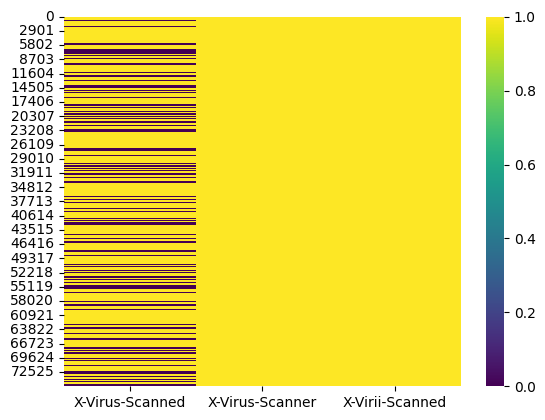

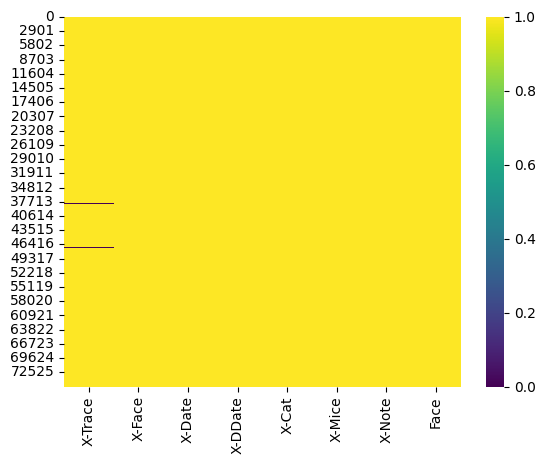

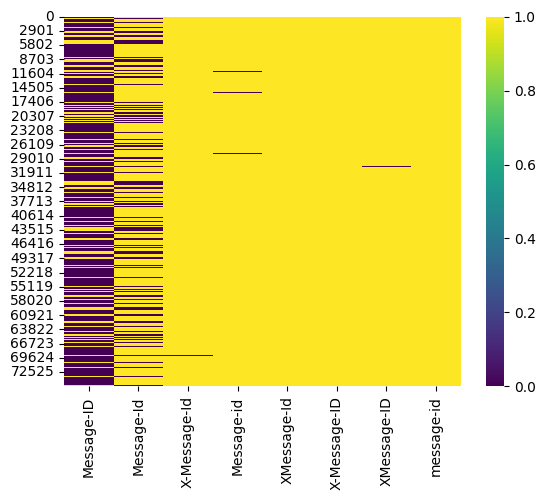

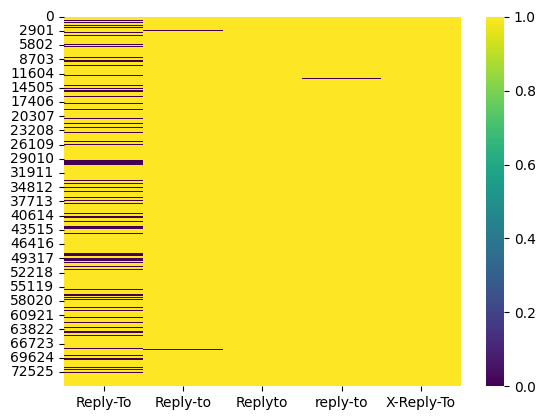

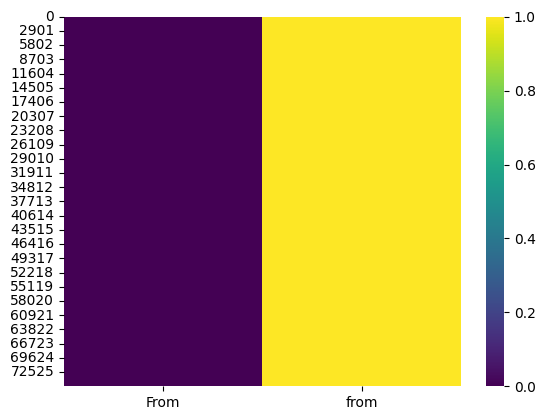

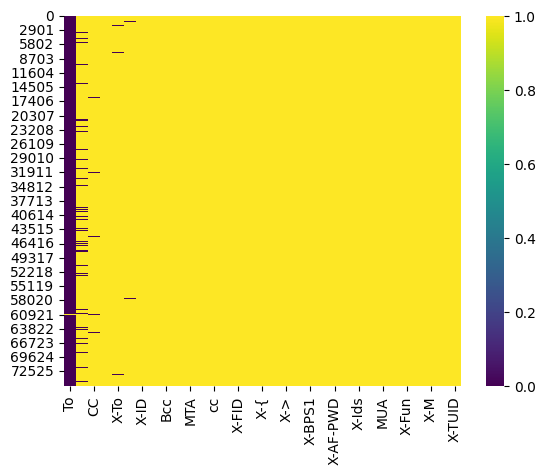

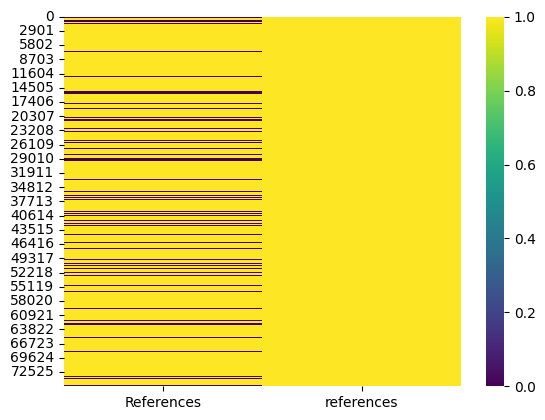

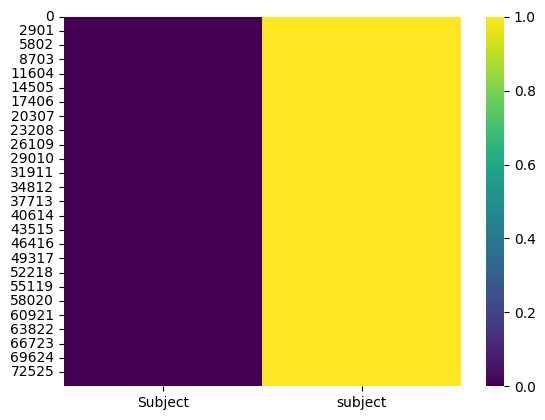

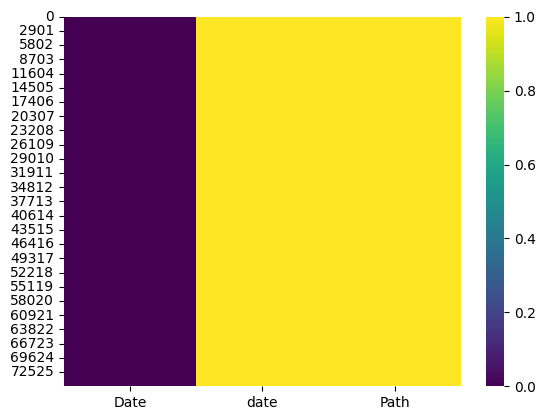

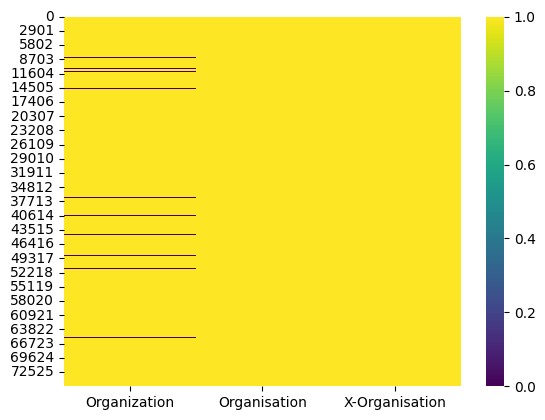

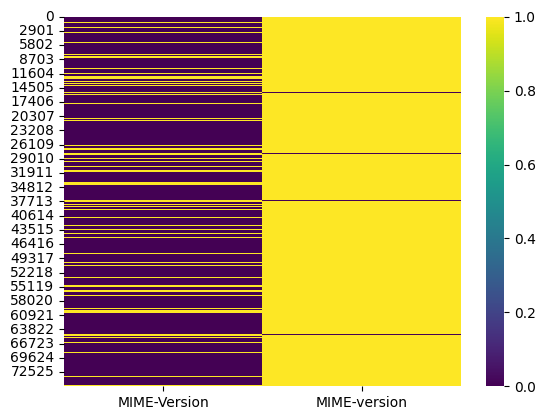

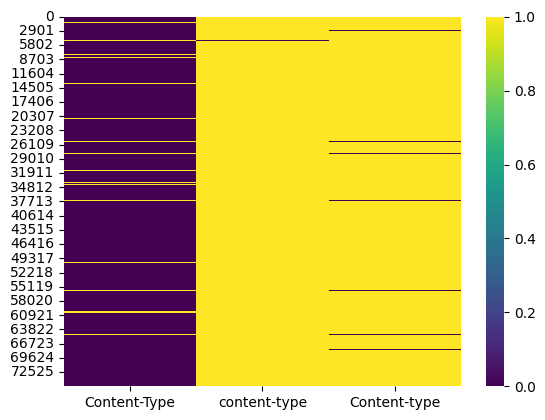

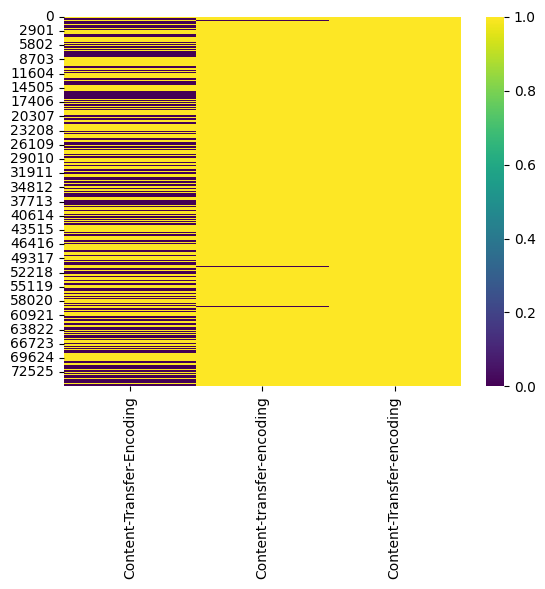

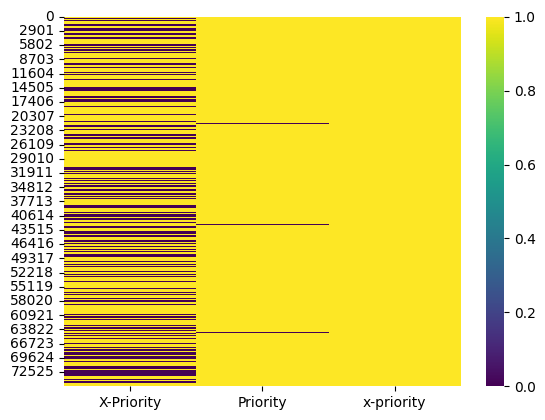

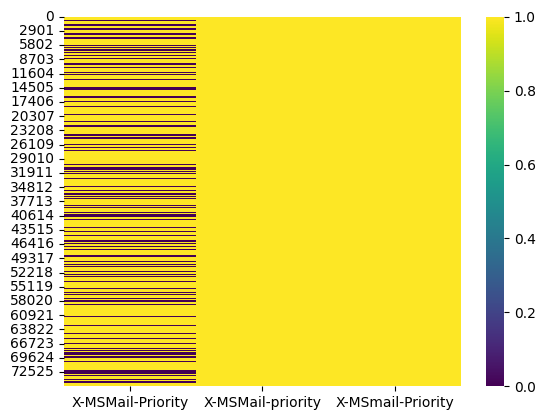

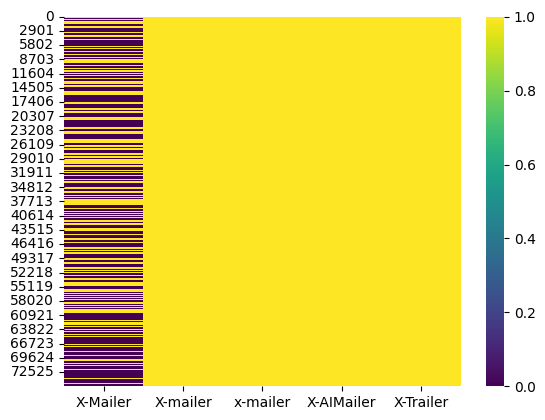

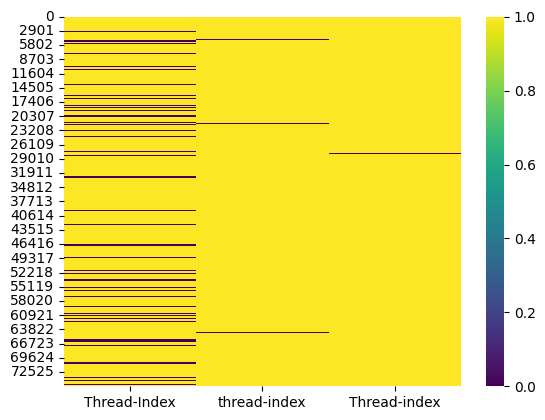

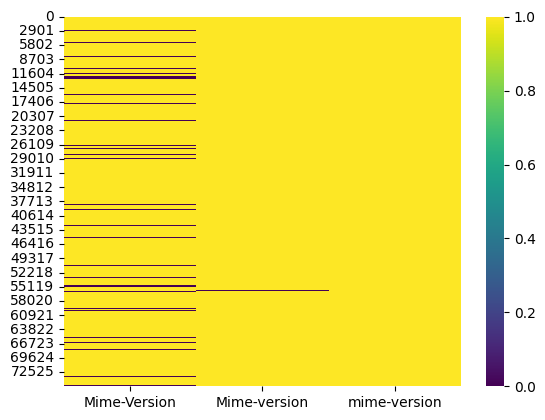

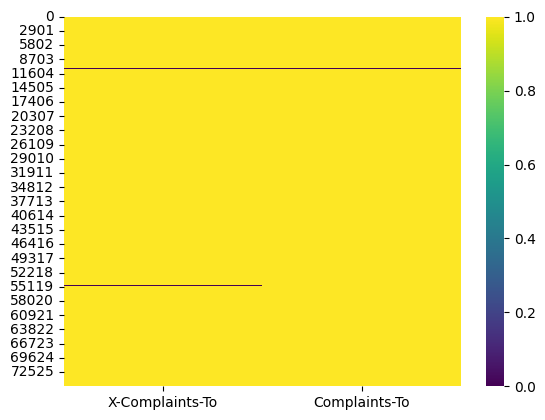

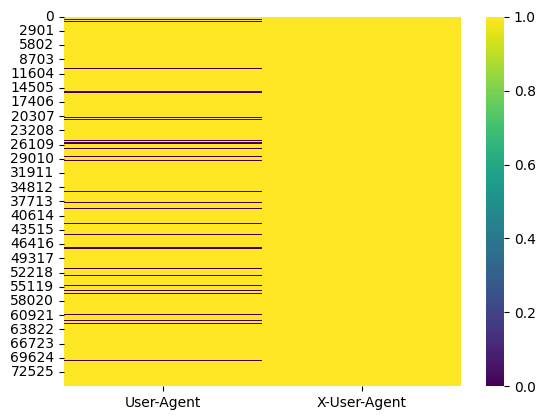

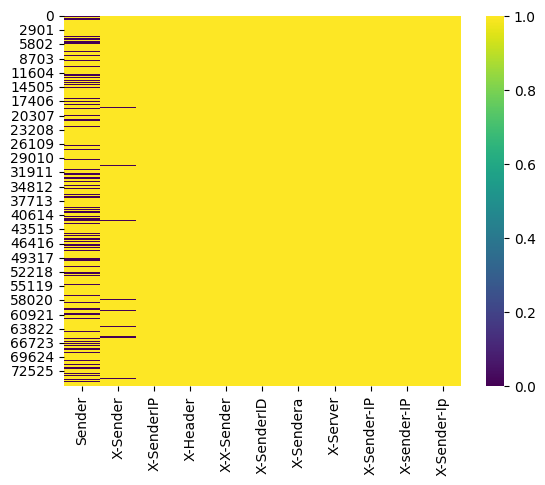

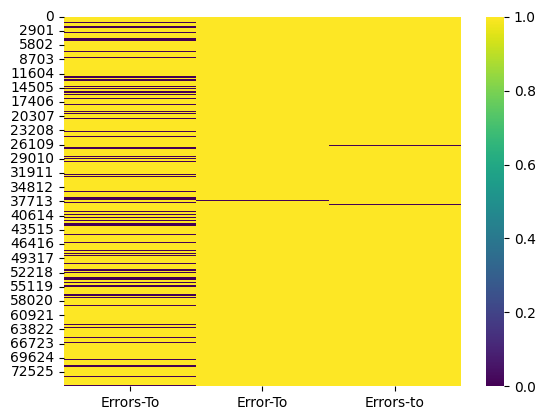

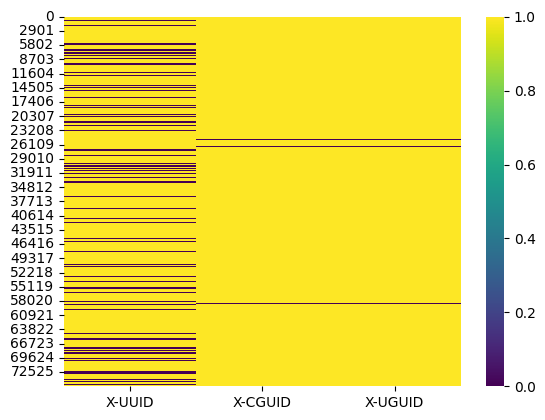

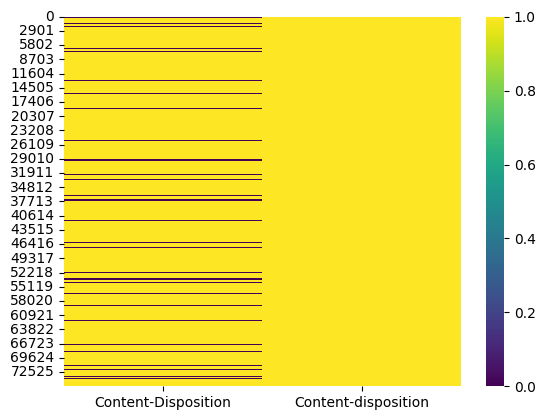

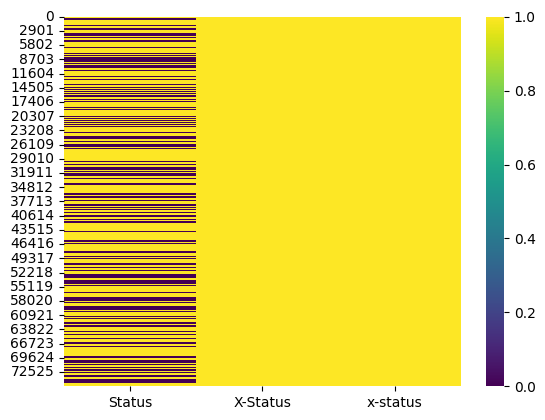

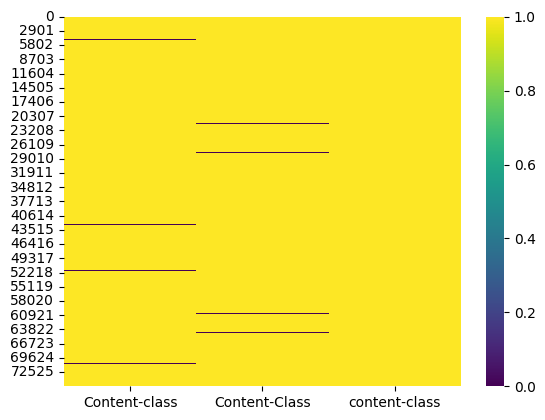

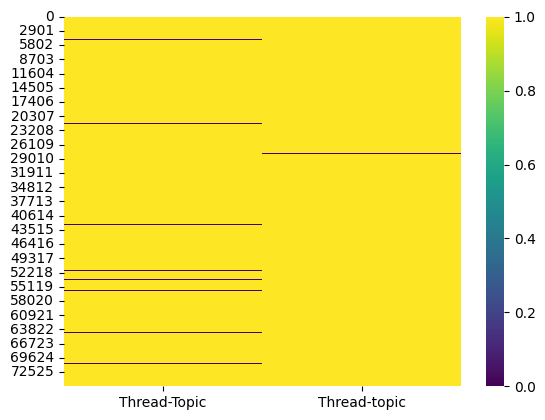

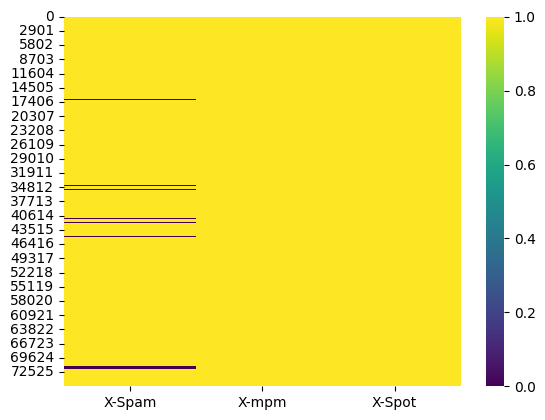

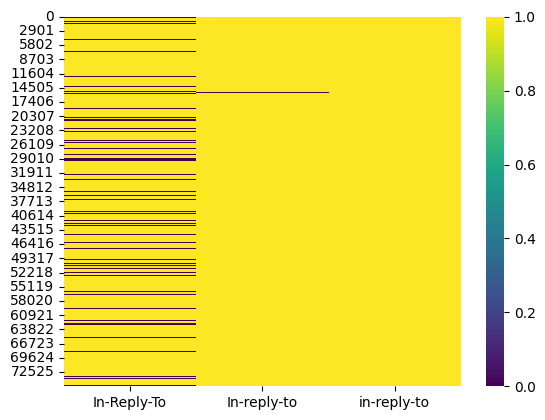

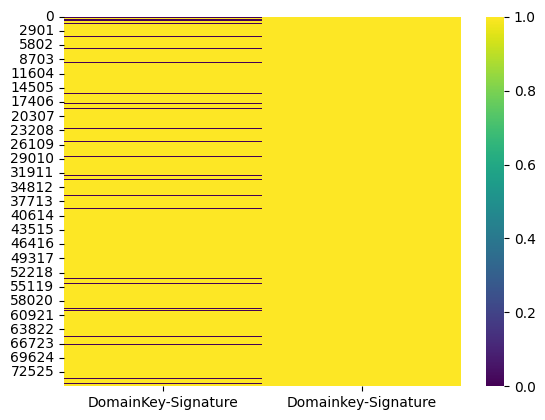

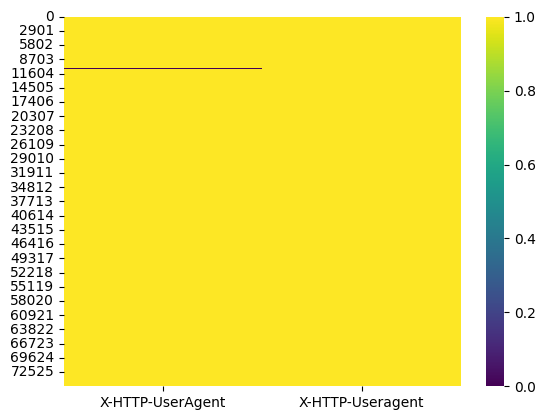

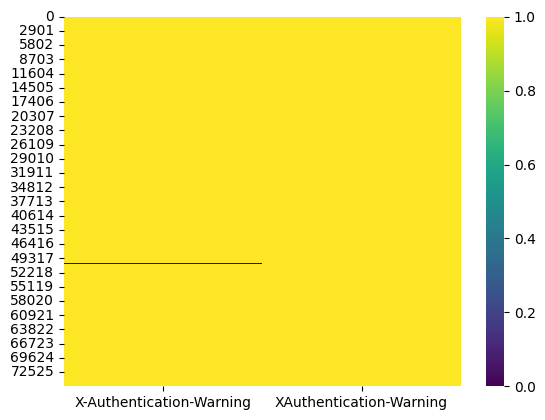

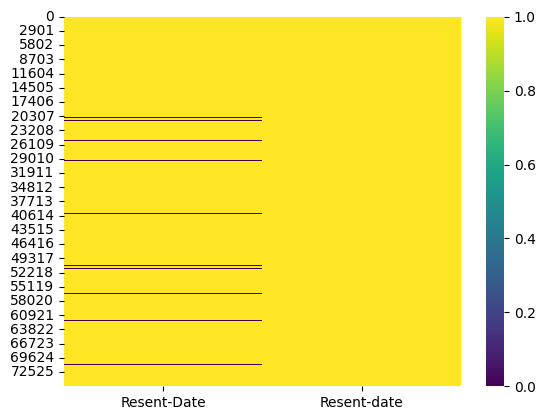

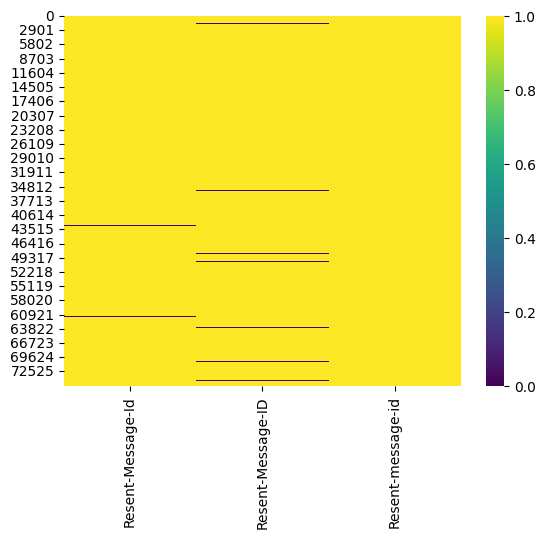

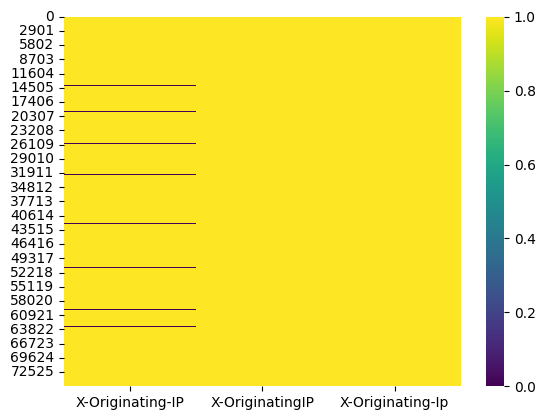

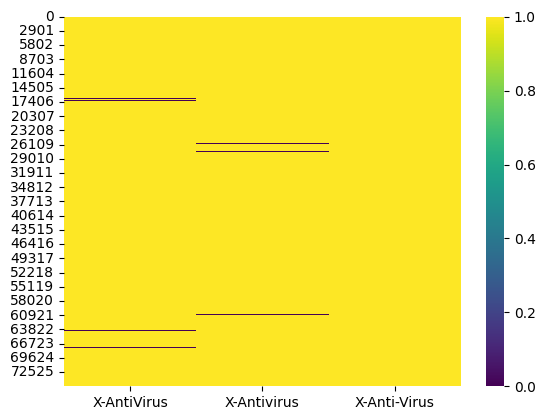

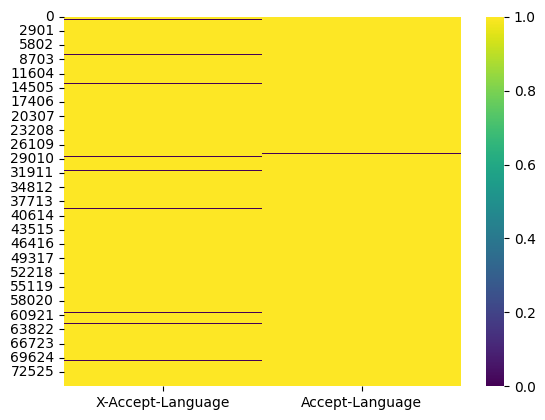

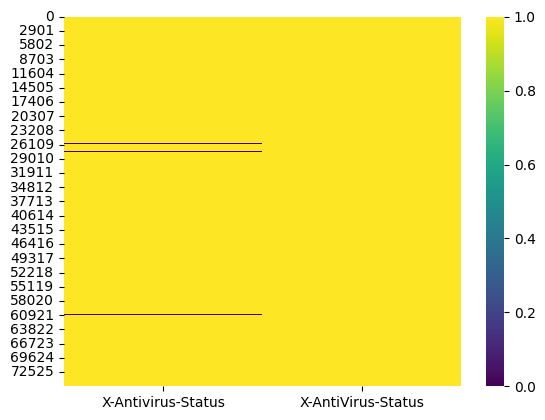

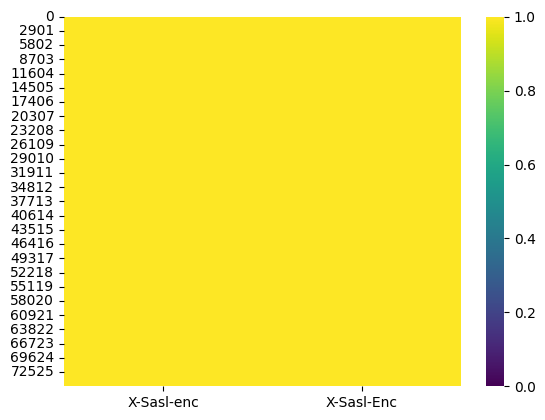

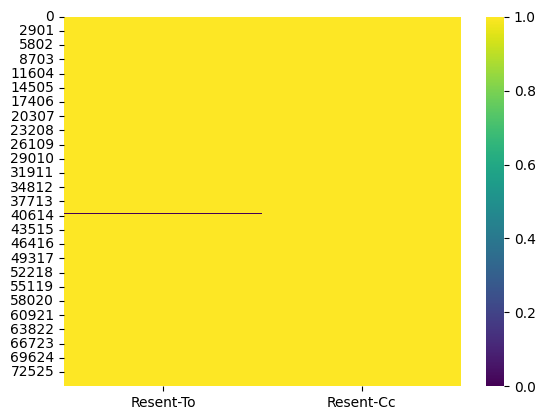

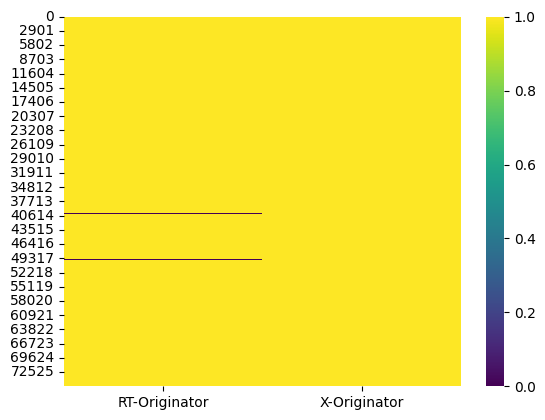

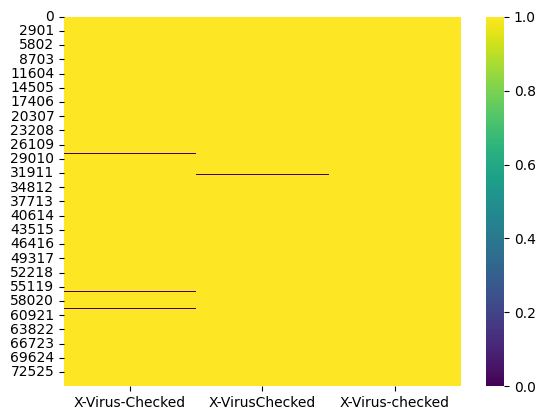

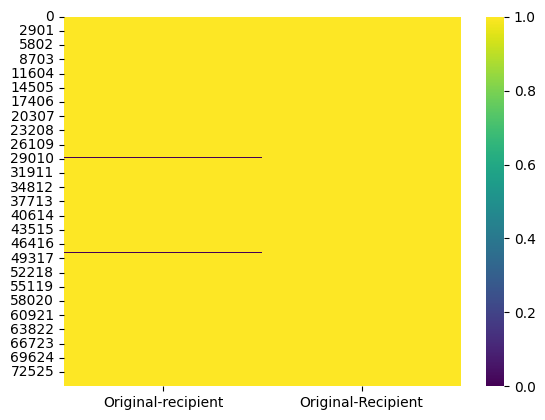

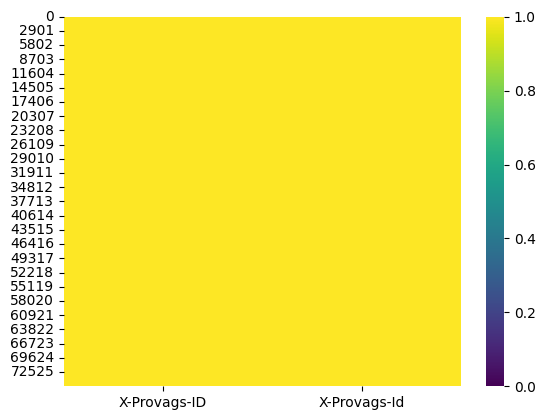

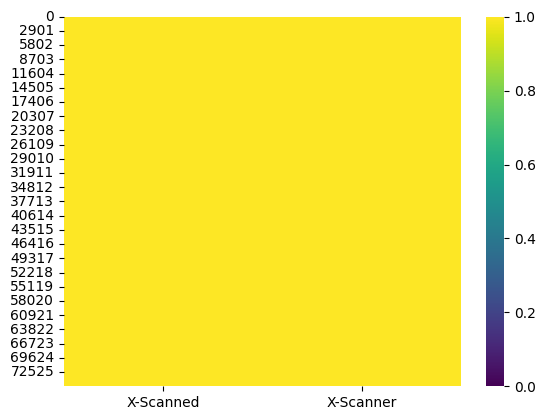

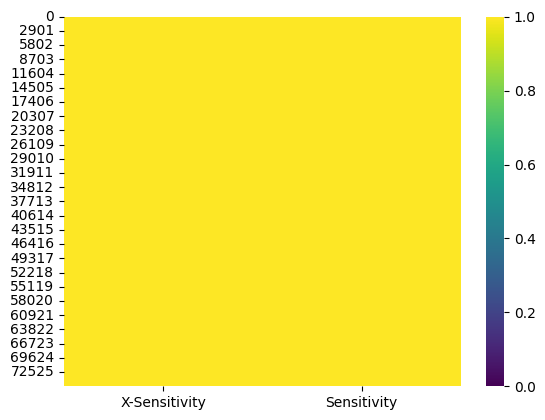

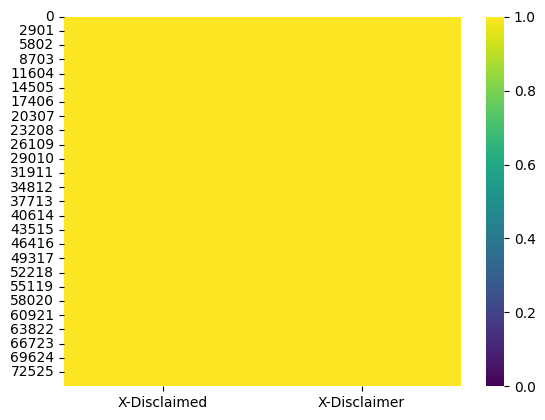

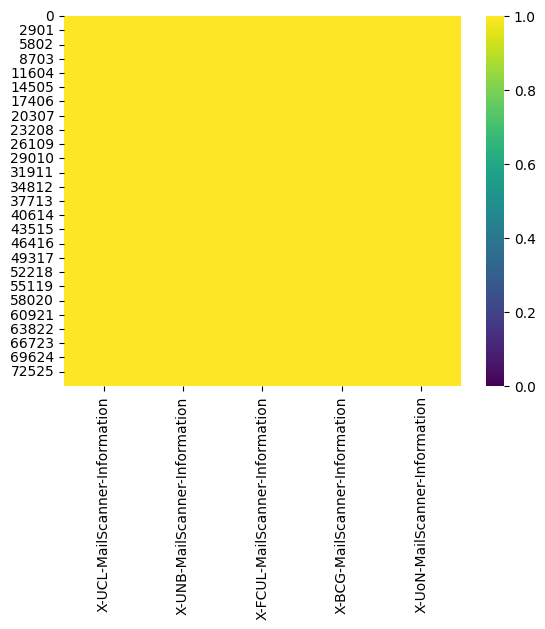

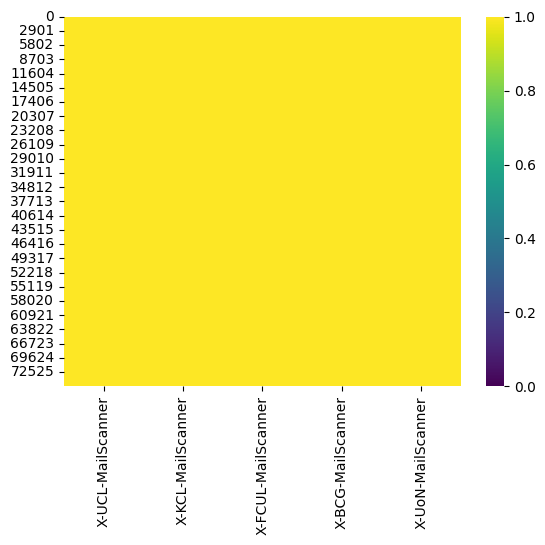

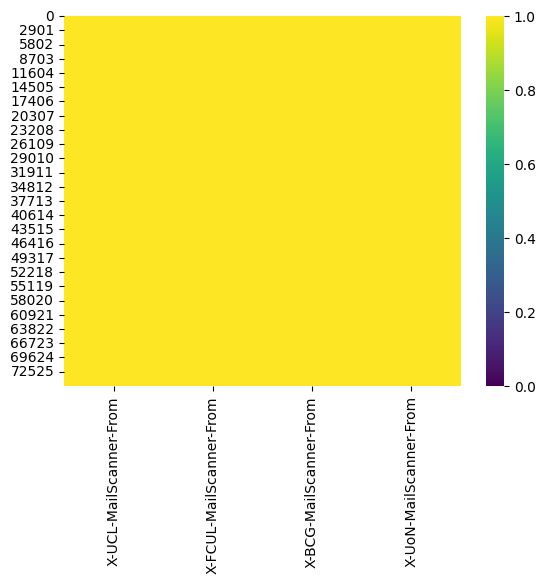

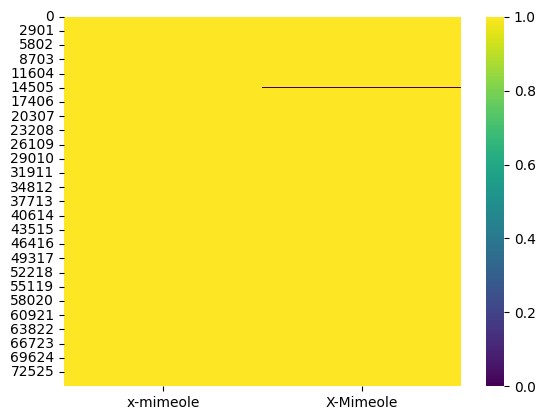

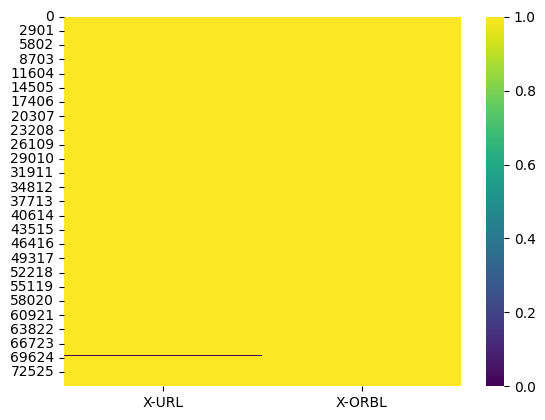

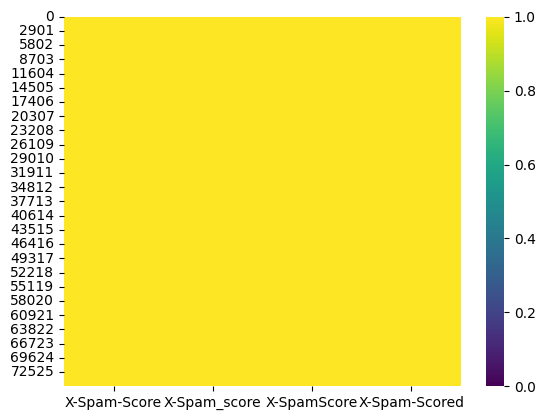

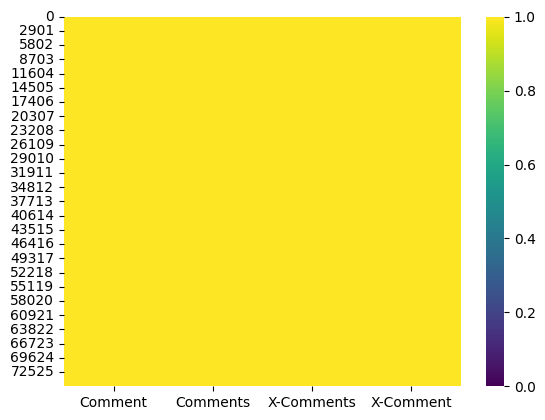

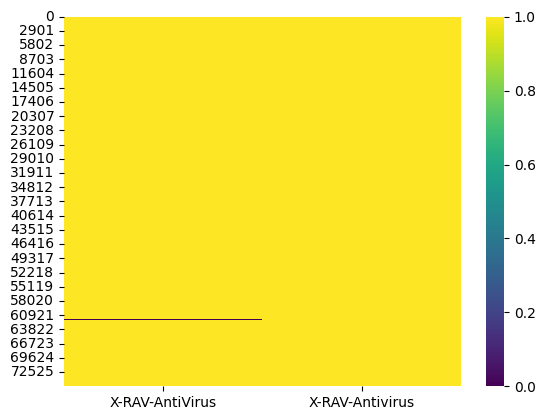

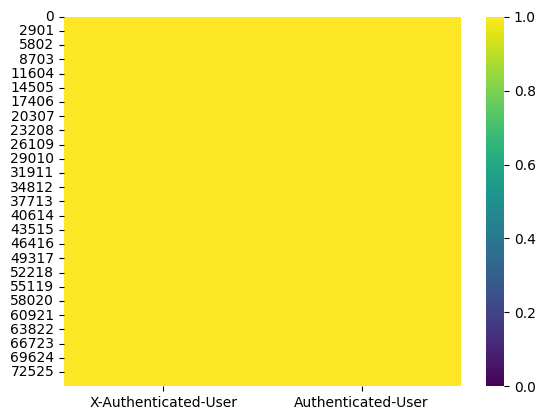

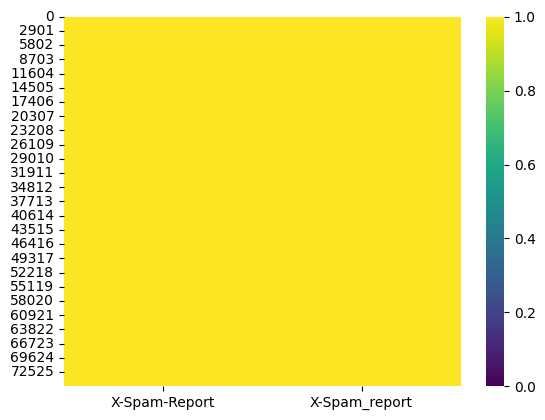

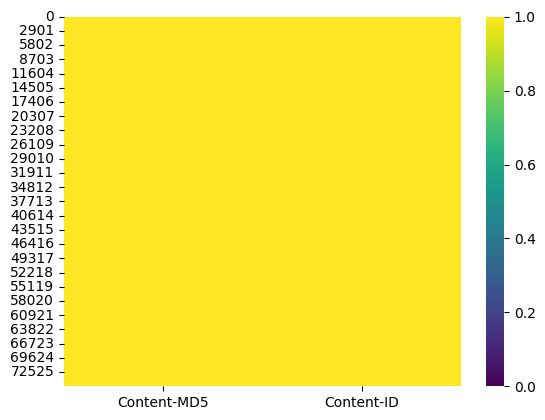

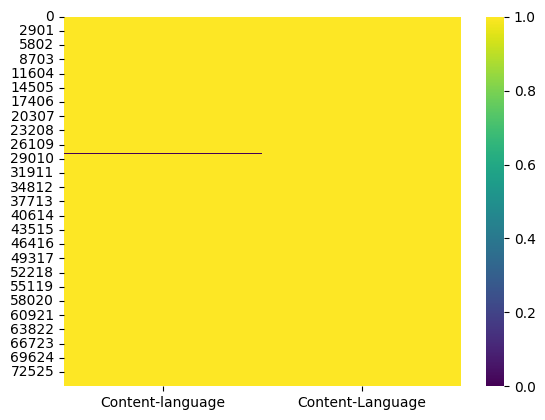

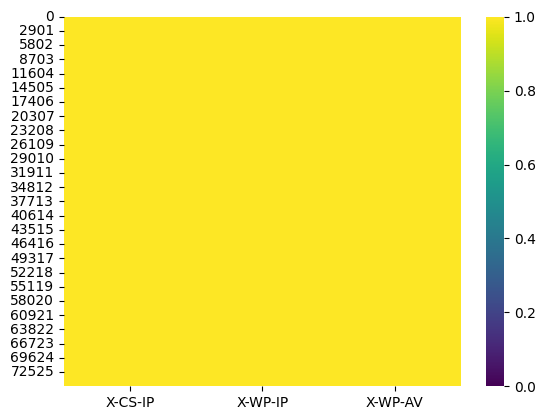

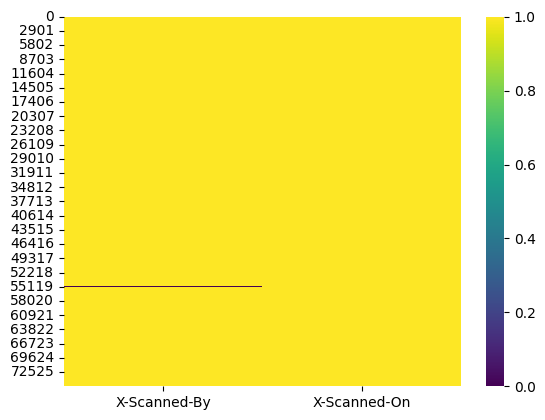

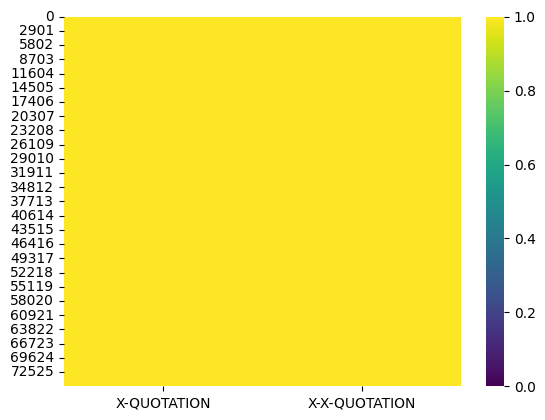

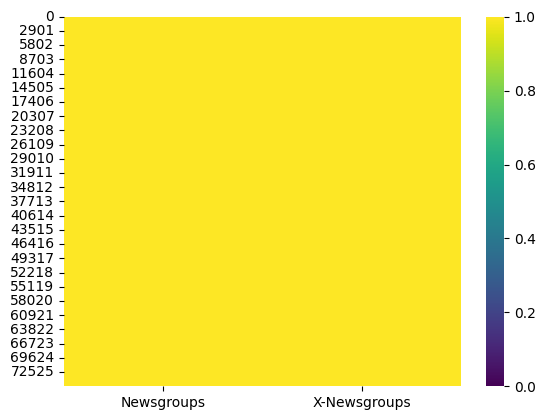

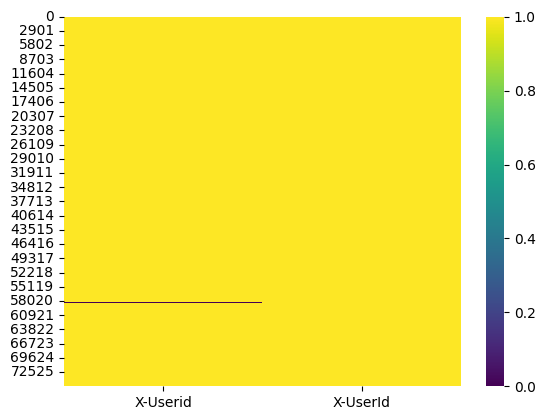

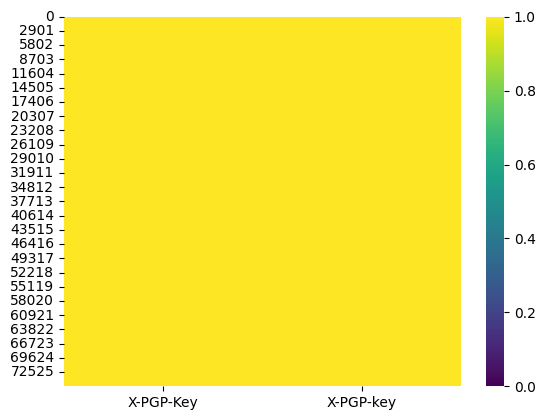

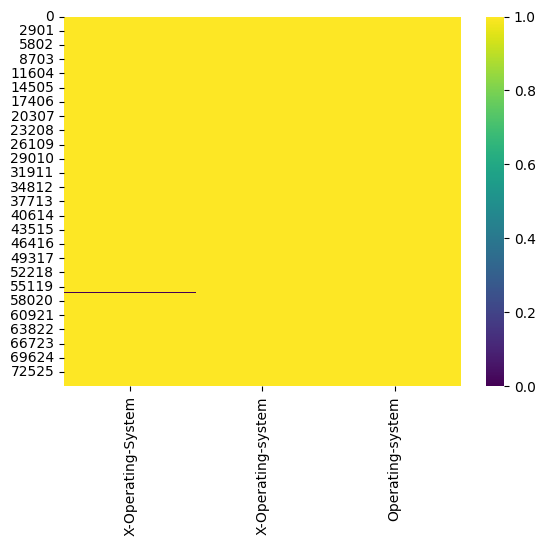

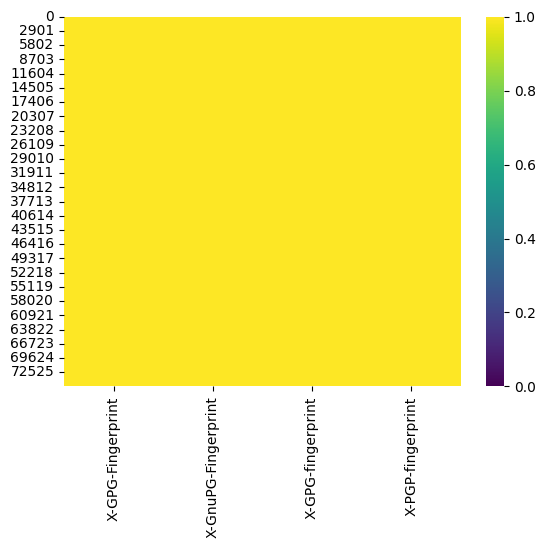

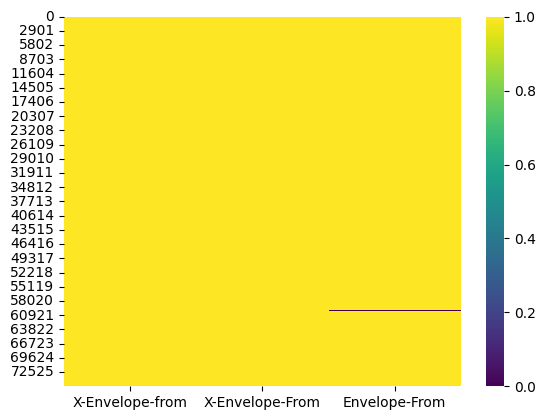

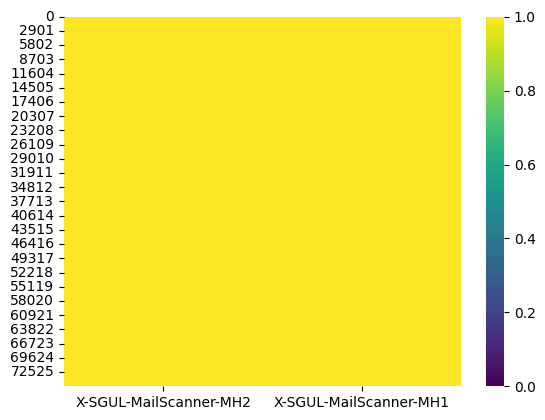

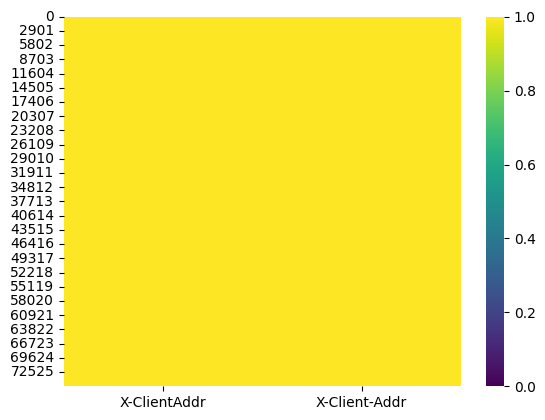

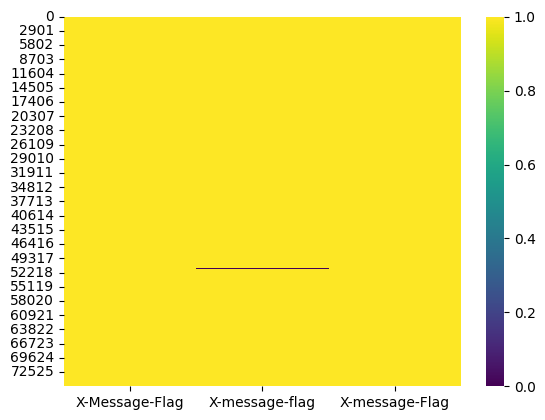

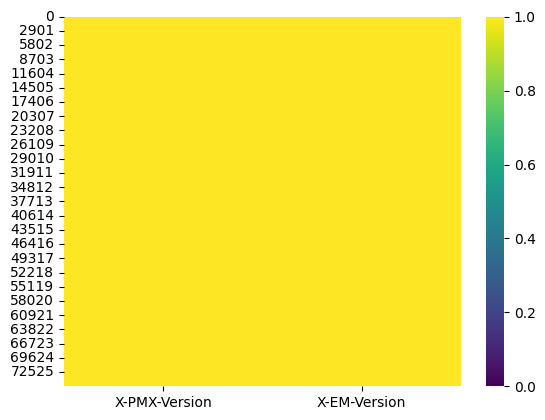

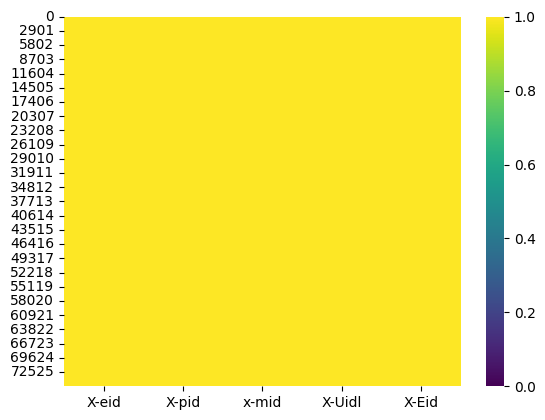

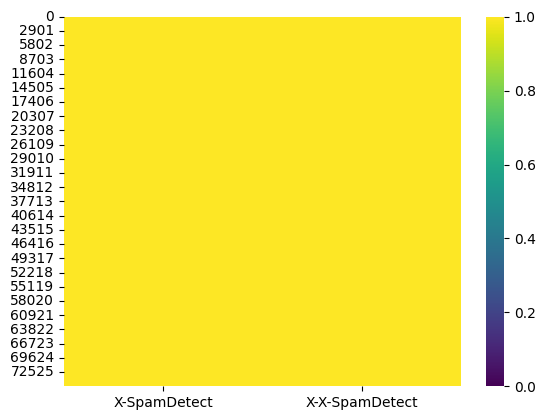

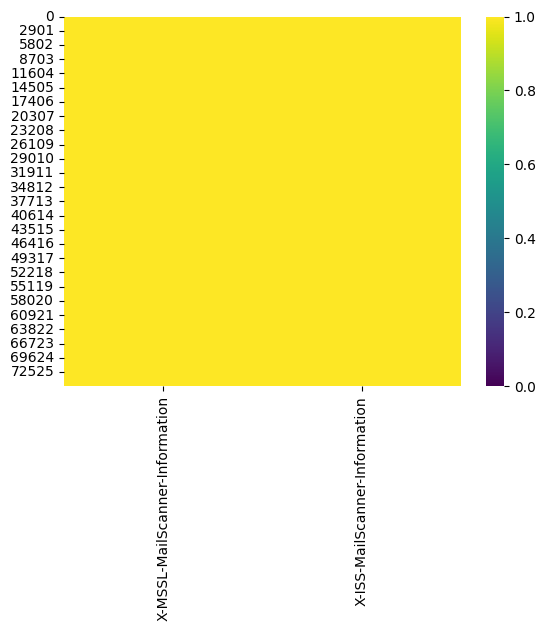

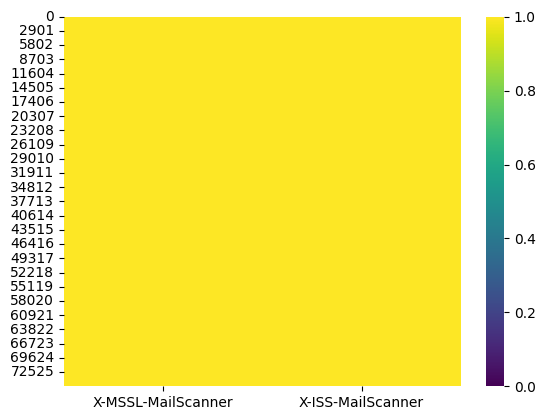

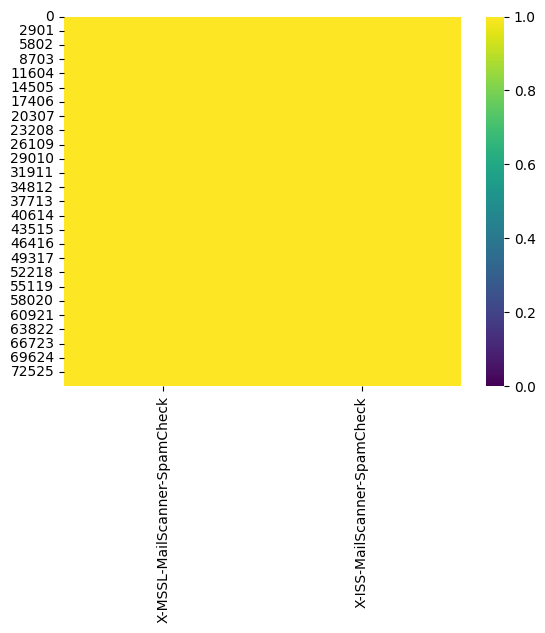

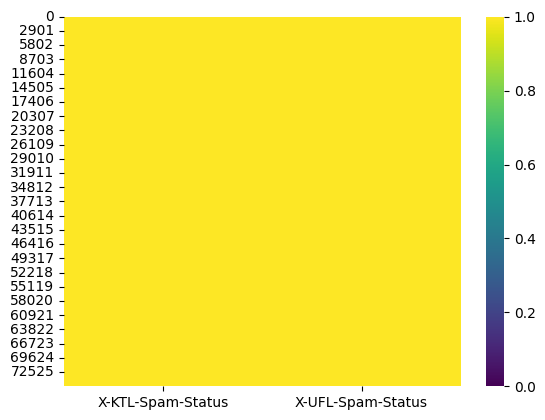

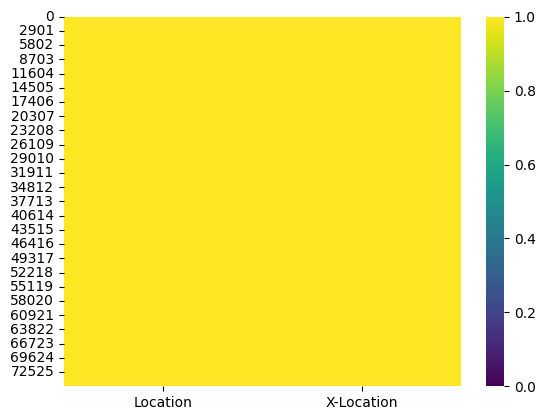

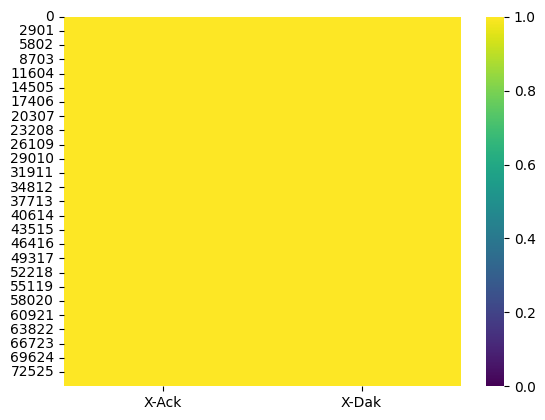

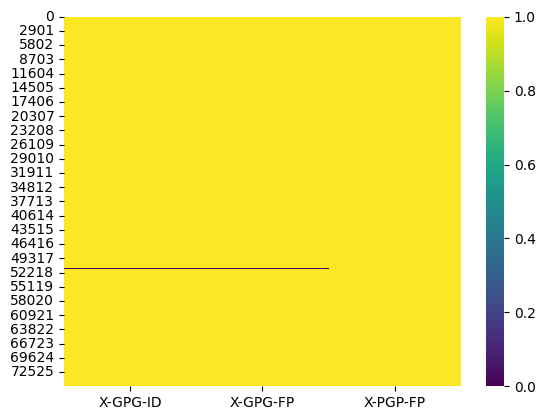

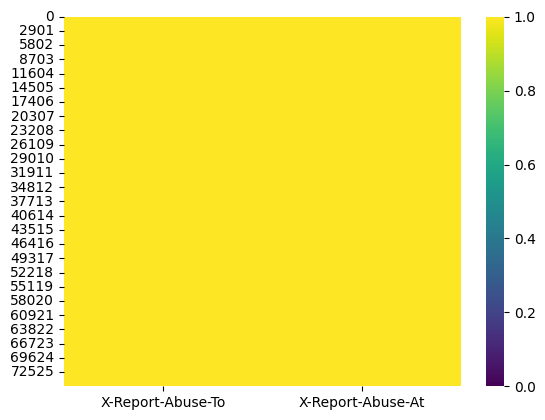

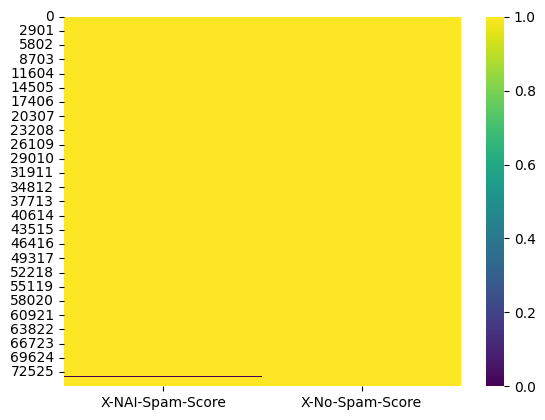

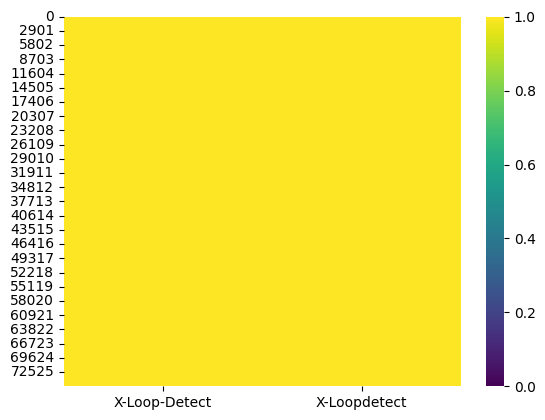

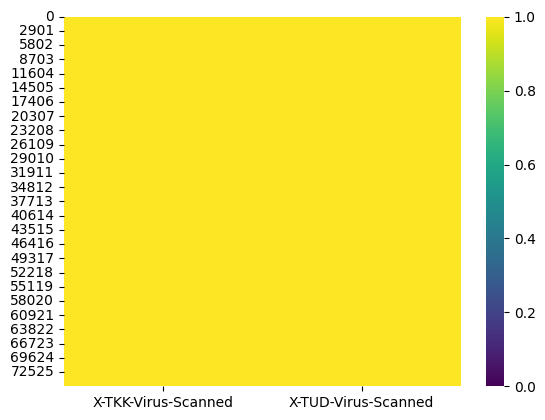

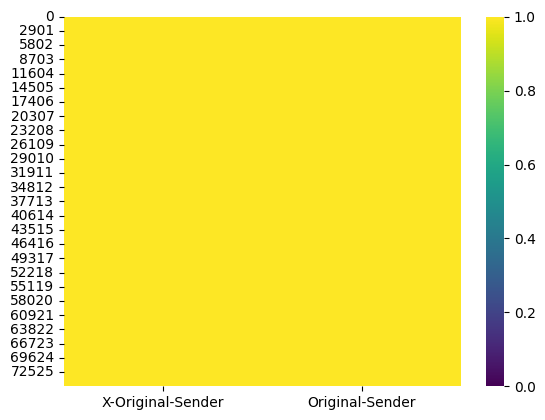

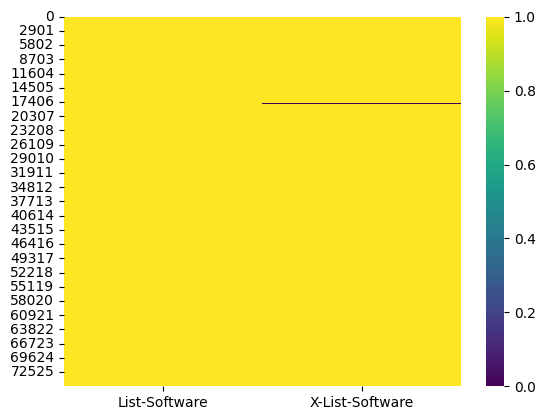

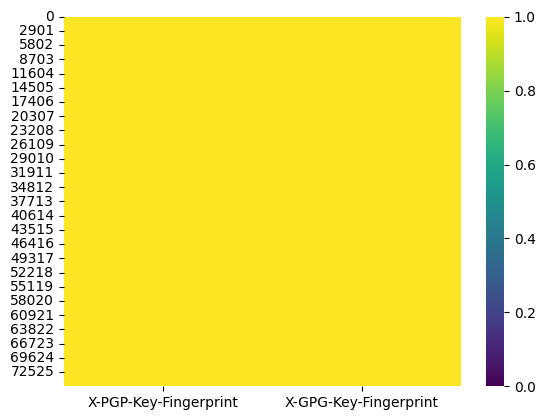

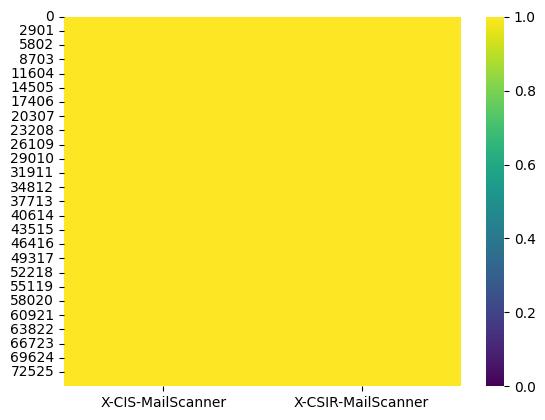

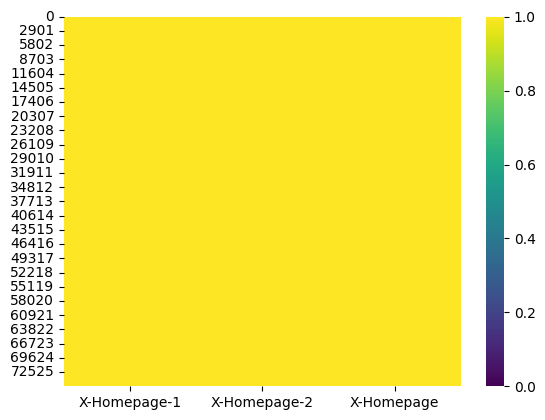

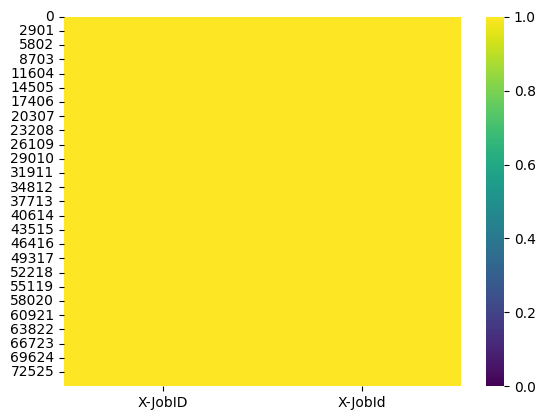

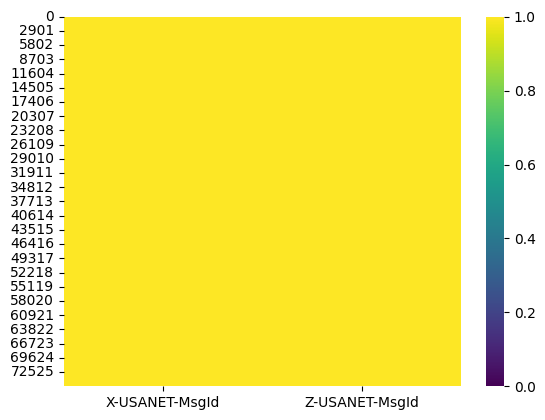

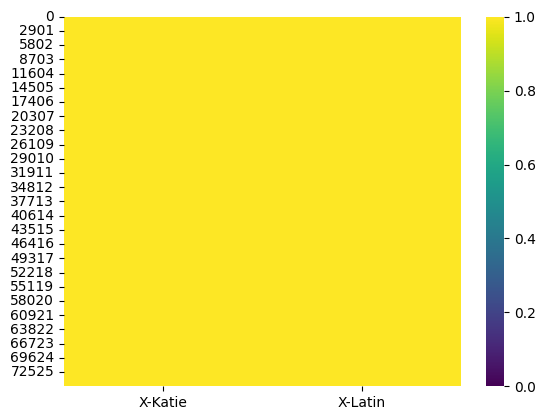

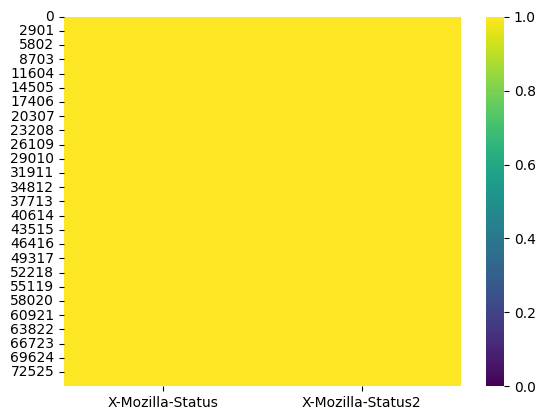

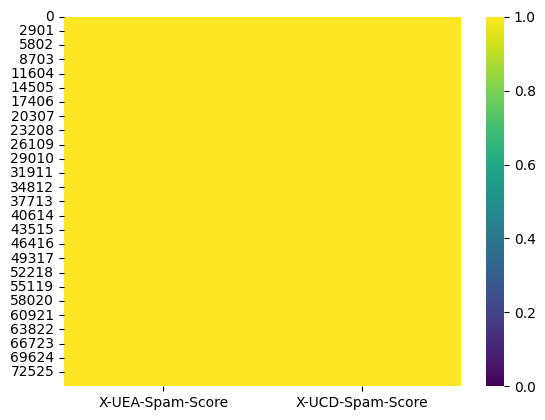

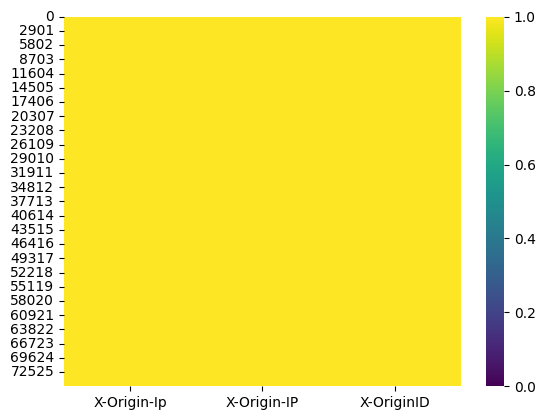

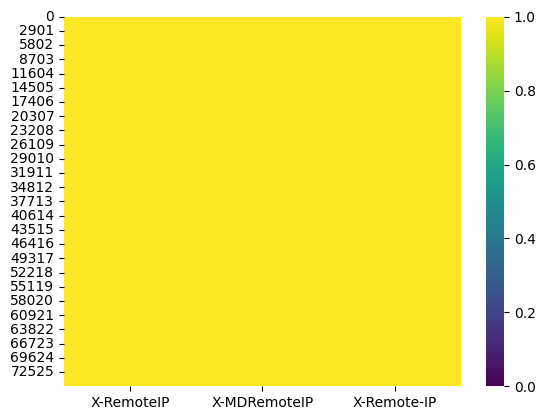

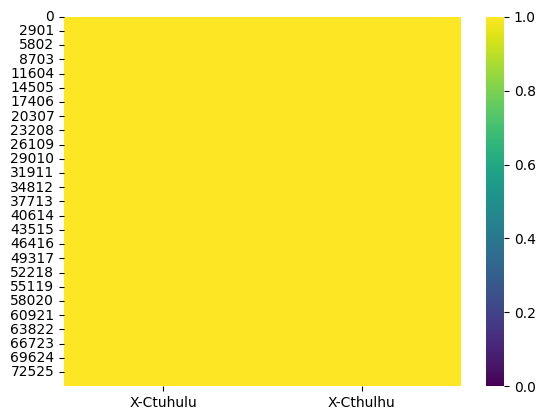

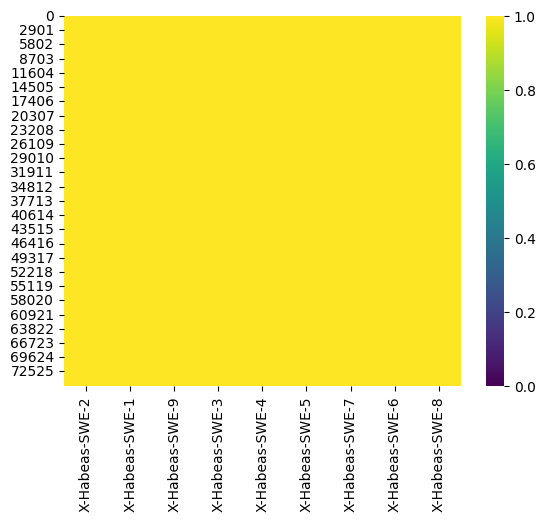

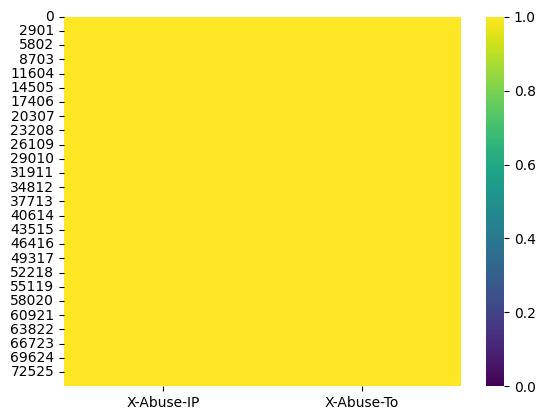

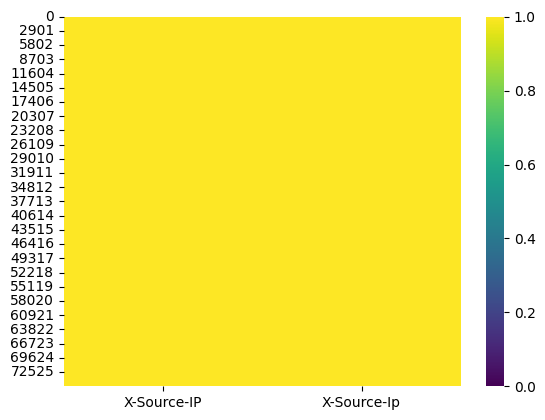

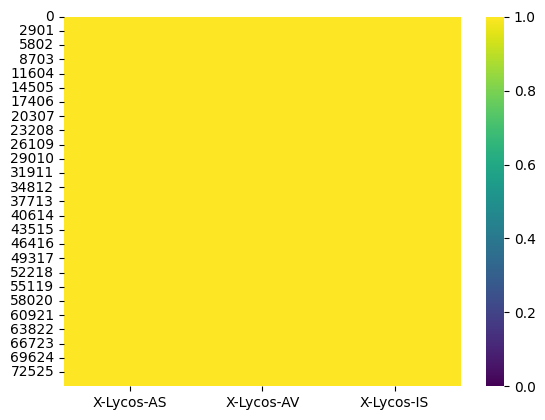

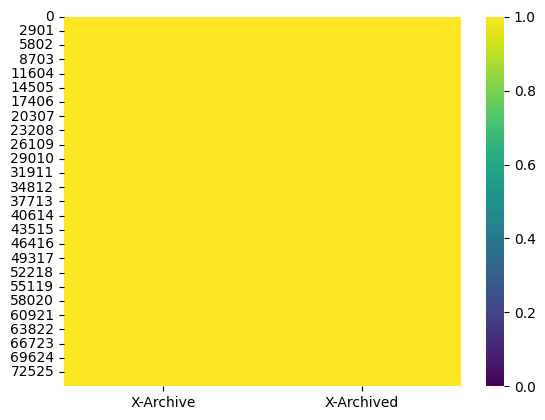

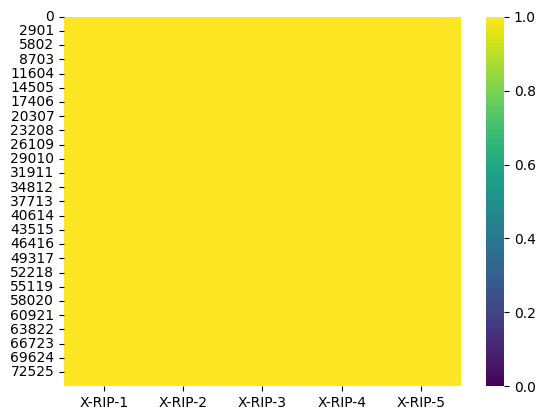

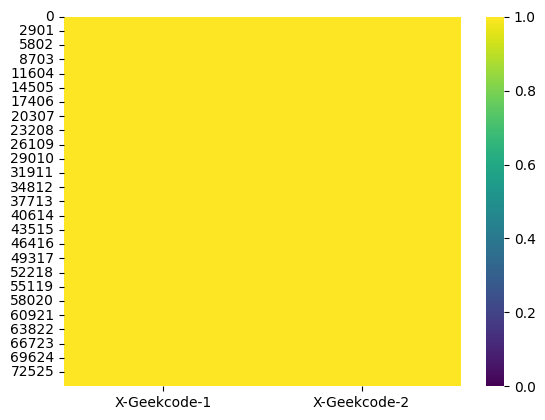

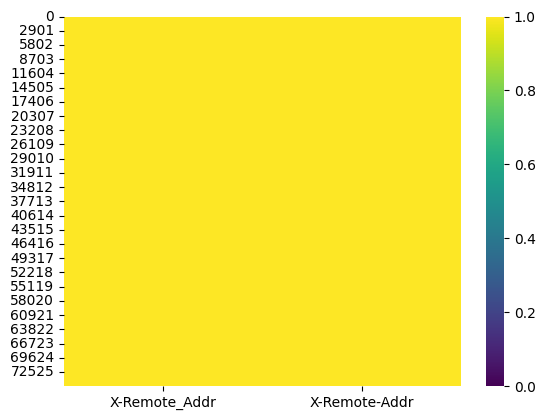

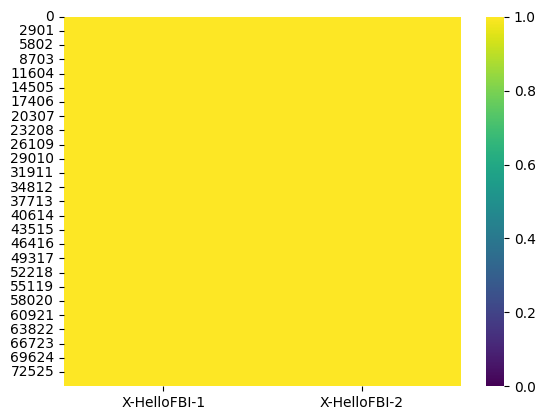

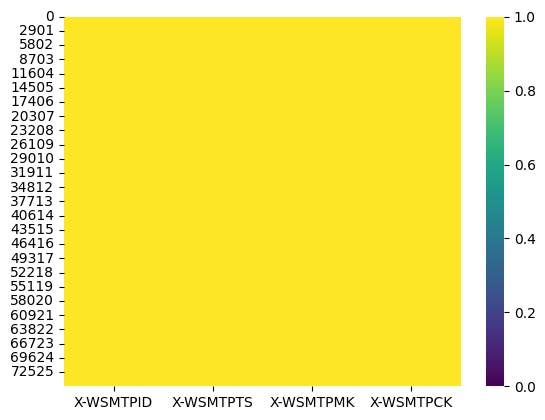

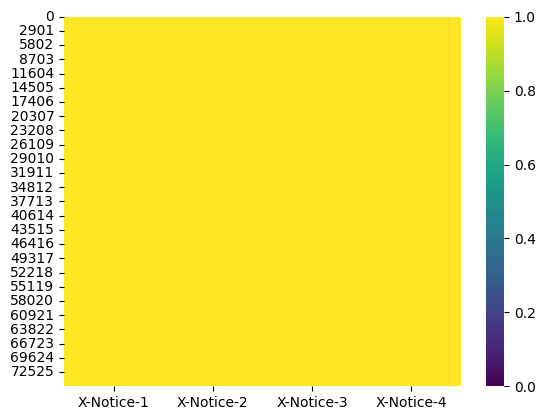

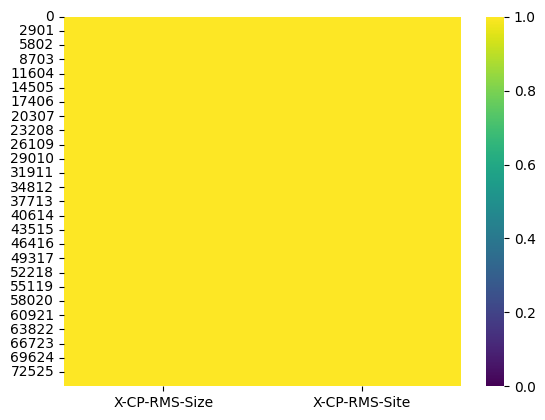

In [11]:


for cluster in clusters_list:
    sns.heatmap(df[cluster].isnull(), cmap='viridis')
    plt.show()
